<center>

# Supervised Classification with QBM's using Generalized Quantum Signal Processing

</center>

<br>

----

<br>

### Description

Supervised classification is the task of assigning data points to predefined categories based on labeled training data. It is a fundamental machine learning problem with a wide range of applications, including fraud detection, medical diagnosis, sentiment analysis, and image recognition. The challenge lies in learning a decision boundary that generalizes well to unseen data, especially in scenarios where the input space is high-dimensional, noisy, or contains intricate correlations. Classical machine learning methods, such as logistic regression or deep neural networks, can perform exceptionally well in many cases; however, they may encounter difficulties in capturing certain non-classical correlations present in complex datasets or in scaling efficiently to very large models.

**Quantum Boltzmann Machines (QBMs)** are generative models capable of learning probability distributions over binary vectors, which can be adapted for supervised learning by conditioning on label information. The rich representational power of QBMs, combined with the ability of quantum devices to sample from complex Gibbs distributions, makes them an intriguing candidate for classification tasks.

In this notebook, we demonstrate a supervised classification workflow using QBMs trained and implemented via **Generalized Quantum Signal Processing (GQSP)**. Unlike standard QSP, which is designed for polynomial transformations of unitary operators, GQSP extends these capabilities to non-unitary transformations such as matrix exponentials, enabling more efficient Gibbs state preparation for machine learning applications. By embedding class labels into the QBM visible layer and optimizing the model parameters to maximize the likelihood of the observed data, the QBM learns to distinguish between classes directly from the joint distribution of features and labels.

---


### Generalized Quantum Signal Processing

Generalized Quantum Signal Processing (GQSP), as introduced in [Wiebe, N., *Generalized Quantum Signal Processing*, *PRX Quantum* **5**, 020349 (2024)](https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.5.020349), extends the standard QSP framework that enables the implementation of non-unitary matrix functions on a quantum computer. While standard QSP focuses on constructing polynomial transformations of a unitary matrix using sequences of single-qubit SU(2) rotations around fixed axes, GQSP generalizes this approach by allowing more flexible rotation axes.

In the context of Quantum Boltzmann Machines, GQSP is particularly valuable because it allows the efficient construction of operators of the form \(e^{-\beta H_\theta/2}\). The phase angles for GQSP have been shown to be calculable efficiently in \(\mathcal{O}(d \log d)\) steps, where \(d\) is the degree of the target polynomial approximation.  In addition, GQSP lifts the restriction that polynomials must have a fixed parity, a limitation of standard QSP.



### MNIST DATASET

We use the MNIST dataset to validate performance of the QBM based on GQSP. The number of qubits dedicated to the output in the visble layer is log2(num_classes). We demonstrate a classification task with 4 classes.

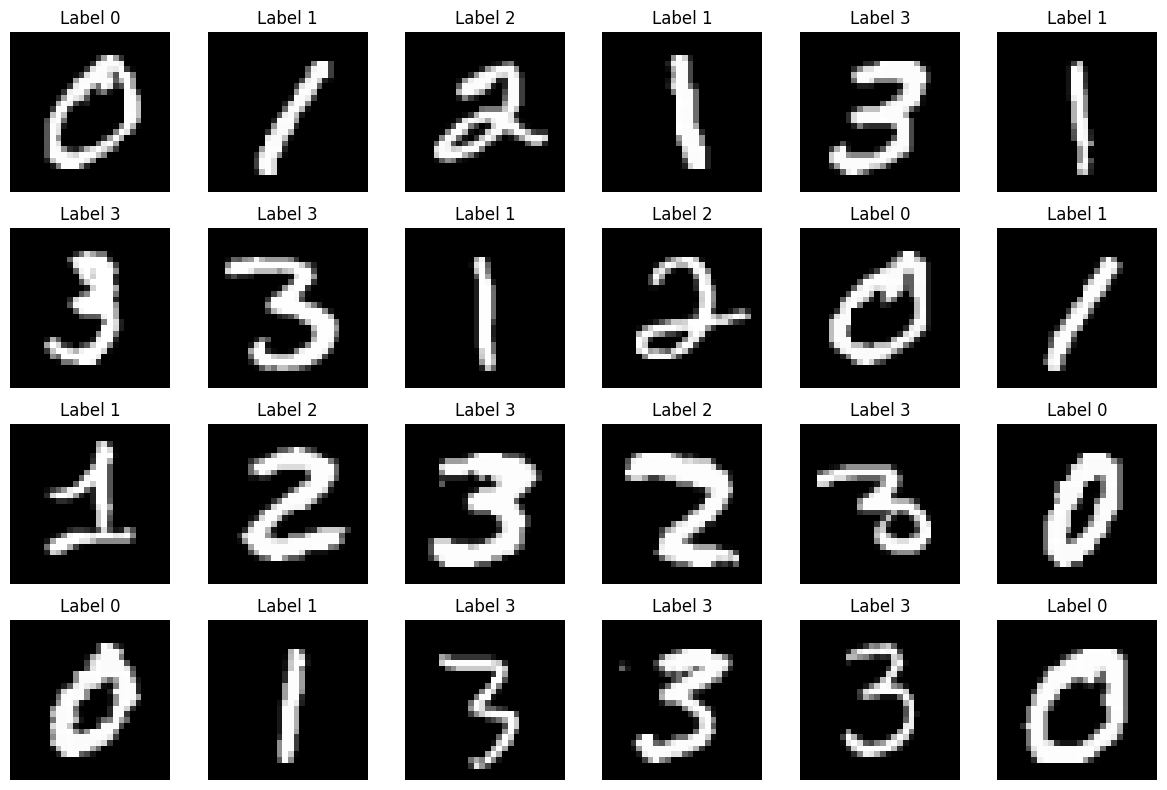

In [1]:
from datasets import make_nonlinear_classification,to_binary
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from datasets import *

num_classes=4


X_norm, y_sel, X_raw, pca, scaler = load_and_preprocess_mnist(
    classes=[0,1,2,3], n_components=num_classes)


# Create train and test datasets

test_size=0.2
random_state=21
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y_sel, test_size=test_size, random_state=random_state
)


## Transform class labels to binary numbers
y_train_binary=to_binary(y_train)
y_test_binary=to_binary(y_test)
# visualize a few raw images




visualize_samples(X_raw, y_sel, sample_indices=list(range(24)), n_cols=6)


### Defining the QBM model and Training.

The implementation here allows for arbitrary Hamiltonians for the QBM. The Pauli-terms that should appear in the interaction Hamiltonian can be specified as a list of strings. Ex: ['XX','ZZZ'].
The use of multi-qubit interactions reduces the number of hidden-nodes required to model non-linear datasets.

In [2]:
## Convert class labels to binary
from QBM import *

y_bin=to_binary(y_sel)


## Specify Hamiltonian terms
terms = ['X','ZZZ']

num_features=4

# Choose Hidden Units
n_hidden=1


# Number of output qubits in the visible layer is the logarithm of number of classes.
n_output_qubits=int(np.log2(num_classes))

n_visible=num_features+n_output_qubits

# Define the Quantum Bolzmann machine 
qbm=QBM(n_hidden,n_visible,n_output_qubits,terms=terms)


# Training the model
loss=qbm.train_model(X_train,y_train_binary,X_norm,y_sel,12,0.1,2)



[PolyTaylorSeries] (Cheb) max 0.8143536762323639 is at -1.0: normalizing
[PolyTaylorSeries] (Cheb) average error = 6.217248937900877e-17 in the domain [-1, 1] using degree 20
Epoch 1


0it [00:00, ?it/s]C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(


Accuracy (sklearn): 0.2173


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
1it [00:06,  6.52s/it]

Accuracy (sklearn): 0.3012


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
2it [00:13,  6.73s/it]

Accuracy (sklearn): 0.5753


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
3it [00:19,  6.62s/it]

Accuracy (sklearn): 0.6074


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
4it [00:26,  6.77s/it]

Accuracy (sklearn): 0.6593


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
5it [00:33,  6.68s/it]

Accuracy (sklearn): 0.7037


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
6it [00:39,  6.54s/it]

Accuracy (sklearn): 0.7383


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
7it [00:46,  6.77s/it]

Accuracy (sklearn): 0.6741


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
8it [00:53,  6.62s/it]

Accuracy (sklearn): 0.7481


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
9it [00:59,  6.52s/it]

Accuracy (sklearn): 0.7481


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
10it [01:05,  6.41s/it]

Accuracy (sklearn): 0.7877


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
11it [01:12,  6.47s/it]

Accuracy (sklearn): 0.7951


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
12it [01:18,  6.47s/it]

Accuracy (sklearn): 0.8222


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
13it [01:24,  6.40s/it]

Accuracy (sklearn): 0.8593


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
14it [01:31,  6.54s/it]

Accuracy (sklearn): 0.8370


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
15it [01:38,  6.55s/it]

Accuracy (sklearn): 0.8395


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
16it [01:44,  6.48s/it]

Accuracy (sklearn): 0.8617


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
17it [01:51,  6.43s/it]

Accuracy (sklearn): 0.8642


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
18it [01:57,  6.54s/it]

Accuracy (sklearn): 0.8543


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
19it [02:04,  6.49s/it]

Accuracy (sklearn): 0.8790


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
20it [02:10,  6.47s/it]

Accuracy (sklearn): 0.8790


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
21it [02:17,  6.44s/it]

Accuracy (sklearn): 0.8790


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
22it [02:23,  6.48s/it]

Accuracy (sklearn): 0.8790


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
23it [02:29,  6.45s/it]

Accuracy (sklearn): 0.8790


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
24it [02:36,  6.45s/it]

Accuracy (sklearn): 0.8790


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
25it [02:42,  6.48s/it]

Accuracy (sklearn): 0.8790


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
26it [02:49,  6.48s/it]

Accuracy (sklearn): 0.8840


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
27it [02:56,  6.54s/it]


0.9815231603830057
Epoch 2


0it [00:00, ?it/s]

Accuracy (sklearn): 0.8815


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
1it [00:06,  6.41s/it]

Accuracy (sklearn): 0.8790


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
2it [00:13,  6.55s/it]

Accuracy (sklearn): 0.8815


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
3it [00:19,  6.46s/it]

Accuracy (sklearn): 0.8790


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
4it [00:26,  6.57s/it]

Accuracy (sklearn): 0.8864


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
5it [00:33,  6.81s/it]

Accuracy (sklearn): 0.8840


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
6it [00:39,  6.69s/it]

Accuracy (sklearn): 0.8864


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
7it [00:46,  6.84s/it]

Accuracy (sklearn): 0.8840


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
8it [00:53,  6.70s/it]

Accuracy (sklearn): 0.8914


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
9it [01:00,  6.76s/it]

Accuracy (sklearn): 0.8963


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
10it [01:06,  6.71s/it]

Accuracy (sklearn): 0.8938


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
11it [01:13,  6.68s/it]

Accuracy (sklearn): 0.9012


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
12it [01:19,  6.62s/it]

Accuracy (sklearn): 0.9037


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
13it [01:26,  6.67s/it]

Accuracy (sklearn): 0.8988


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
14it [01:33,  6.83s/it]

Accuracy (sklearn): 0.8988


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
15it [01:40,  6.79s/it]

Accuracy (sklearn): 0.8988


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
16it [01:47,  6.67s/it]

Accuracy (sklearn): 0.8963


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
17it [01:53,  6.74s/it]

Accuracy (sklearn): 0.8963


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
18it [02:00,  6.62s/it]

Accuracy (sklearn): 0.8963


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
19it [02:06,  6.62s/it]

Accuracy (sklearn): 0.8988


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
20it [02:13,  6.60s/it]

Accuracy (sklearn): 0.8988


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
21it [02:20,  6.63s/it]

Accuracy (sklearn): 0.8963


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
22it [02:26,  6.57s/it]

Accuracy (sklearn): 0.8963


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
23it [02:33,  6.59s/it]

Accuracy (sklearn): 0.9012


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
24it [02:39,  6.60s/it]

Accuracy (sklearn): 0.8988


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
25it [02:46,  6.66s/it]

Accuracy (sklearn): 0.8963


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
26it [02:53,  6.61s/it]

Accuracy (sklearn): 0.8988


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
27it [03:00,  6.67s/it]

1.2572698347483726


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Training model with different Hamiltonian terms 

For model #2 , we use only two qubit terms keeping only the 'ZZ' interactions for demonstration.

In [6]:
## Convert class labels to binary
from QBM import *

y_bin=to_binary(y_sel)

terms = ['ZZ']

num_features=4
n_hidden=1

n_output_qubits=int(np.log2(num_classes))
n_visible=num_features+n_output_qubits

# Define the Quantum Bolzmann machine 
qbm2=QBM(n_hidden,n_visible,n_output_qubits,terms=terms)


# Training the model
loss2=qbm2.train_model(X_train,y_train_binary,X_norm,y_sel,12,0.1,2)



[PolyTaylorSeries] (Cheb) max 0.8143536762323639 is at -1.0: normalizing
[PolyTaylorSeries] (Cheb) average error = 6.217248937900877e-17 in the domain [-1, 1] using degree 20
Epoch 1


0it [00:00, ?it/s]

Accuracy (sklearn): 0.2099


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
1it [00:04,  4.61s/it]

Accuracy (sklearn): 0.5630


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
2it [00:09,  4.66s/it]

Accuracy (sklearn): 0.7235


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
3it [00:14,  4.78s/it]

Accuracy (sklearn): 0.7284


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
4it [00:19,  4.86s/it]

Accuracy (sklearn): 0.7136


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
5it [00:23,  4.65s/it]C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
6it [00:27,  4.54s/it]

Accuracy (sklearn): 0.7432
Accuracy (sklearn): 0.7556


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
7it [00:32,  4.54s/it]C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
8it [00:36,  4.51s/it]

Accuracy (sklearn): 0.7136


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
9it [00:41,  4.53s/it]

Accuracy (sklearn): 0.7210
Accuracy (sklearn): 0.7210


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
10it [00:46,  4.60s/it]

Accuracy (sklearn): 0.7210


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
11it [00:51,  4.74s/it]C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
12it [00:56,  4.82s/it]

Accuracy (sklearn): 0.7062
Accuracy (sklearn): 0.7407


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
13it [01:01,  4.88s/it]

Accuracy (sklearn): 0.7235


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
14it [01:06,  4.92s/it]

Accuracy (sklearn): 0.7235


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
15it [01:11,  5.04s/it]

Accuracy (sklearn): 0.7654


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
16it [01:16,  5.12s/it]

Accuracy (sklearn): 0.7654


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
17it [01:21,  5.04s/it]

Accuracy (sklearn): 0.7605


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
18it [01:26,  5.07s/it]

Accuracy (sklearn): 0.7605


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
19it [01:31,  4.89s/it]

Accuracy (sklearn): 0.7728


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
20it [01:36,  4.93s/it]

Accuracy (sklearn): 0.7728


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
21it [01:41,  4.85s/it]

Accuracy (sklearn): 0.7605


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
22it [01:45,  4.88s/it]

Accuracy (sklearn): 0.7704


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
23it [01:50,  4.90s/it]

Accuracy (sklearn): 0.7654


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
24it [01:55,  4.89s/it]

Accuracy (sklearn): 0.7630


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
25it [02:00,  4.83s/it]

Accuracy (sklearn): 0.7605


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
26it [02:05,  4.82s/it]

Accuracy (sklearn): 0.7432


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
27it [02:10,  4.82s/it]


0.8404477402634949
Epoch 2


0it [00:00, ?it/s]

Accuracy (sklearn): 0.7383


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
1it [00:04,  4.93s/it]

Accuracy (sklearn): 0.7284


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
2it [00:09,  4.74s/it]

Accuracy (sklearn): 0.7556


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
3it [00:14,  4.80s/it]

Accuracy (sklearn): 0.7605


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
4it [00:19,  4.77s/it]

Accuracy (sklearn): 0.7259


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
5it [00:24,  4.96s/it]

Accuracy (sklearn): 0.7481


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
6it [00:29,  5.08s/it]

Accuracy (sklearn): 0.7654


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
7it [00:34,  4.88s/it]

Accuracy (sklearn): 0.7383


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
8it [00:39,  4.86s/it]

Accuracy (sklearn): 0.7630


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
9it [00:43,  4.84s/it]

Accuracy (sklearn): 0.7679


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
10it [00:48,  4.82s/it]

Accuracy (sklearn): 0.7531


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
11it [00:53,  4.84s/it]

Accuracy (sklearn): 0.7407


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
12it [00:58,  4.96s/it]

Accuracy (sklearn): 0.7531


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
13it [01:03,  4.88s/it]

Accuracy (sklearn): 0.7383


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
14it [01:08,  4.83s/it]

Accuracy (sklearn): 0.7309


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
15it [01:12,  4.69s/it]

Accuracy (sklearn): 0.7827


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
16it [01:17,  4.69s/it]

Accuracy (sklearn): 0.7679


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
17it [01:22,  4.73s/it]

Accuracy (sklearn): 0.7778


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
18it [01:26,  4.68s/it]

Accuracy (sklearn): 0.7778


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
19it [01:31,  4.67s/it]

Accuracy (sklearn): 0.7877


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
20it [01:36,  4.73s/it]

Accuracy (sklearn): 0.7852


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
21it [01:40,  4.70s/it]

Accuracy (sklearn): 0.7877


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
22it [01:45,  4.65s/it]C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
23it [01:49,  4.59s/it]

Accuracy (sklearn): 0.7753
Accuracy (sklearn): 0.7802


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
24it [01:54,  4.58s/it]C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
25it [01:58,  4.61s/it]

Accuracy (sklearn): 0.7679
Accuracy (sklearn): 0.7654


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
26it [02:09,  6.41s/it]

Accuracy (sklearn): 0.7630


C:\Users\arora\anaconda3\envs\pyqsp\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:41: PennyLaneDeprecationWarning: The control_wires input to ControlledQubitUnitary is deprecated and will be removed in v0.42. Please note that the second positional arg of your input is going to be the new wires, following wires=controlled_wires+target_wires, where target_wires is the optional arg wires in the legacy interface.
  warnings.warn(
27it [02:22,  5.28s/it]

1.0411715418905212


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

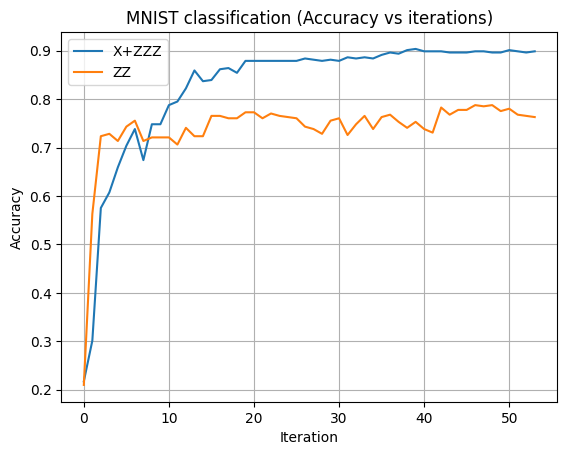

In [10]:
plt.title('MNIST classification (Accuracy vs iterations)')
plt.plot(qbm.accuracy,label='X+ZZZ')
plt.plot(qbm2.accuracy,label='ZZ')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend()
plt.grid()

### Sources


[1] [Amin, M. , Andiyash, E. , Rolfe,J. , Kulchytskyy, B. & Melko, R. (2018). Quantum Boltzmann Machine. Phys. Rev. X,  8.](https://link.aps.org/doi/10.1103/PhysRevX.8.021050)

[2] [Motlagh, D., & Wiebe, N. (2024). _Generalized Quantum Signal Processing_. PRX Quantum, 5, 020368](https://doi.org/10.1103/PRXQuantum.5.020368)


**Package for GQSP angle evaluations:**  
Pyqsp: A toolbox for solving phase factors in Quantum Signal Processing. GitHub: https://github.com/ichuang/pyqsp

